# Problem example

Model economic characteristics of urban neighborhoods (zip code areas), such as  
**income, unemployment or average real estate prices using the structure of 311 complains**  
as a signature of social activity.

[Wang L, Qian C, Kats P, Kontokosta C, Sobolevsky, S. (2017) Structure of 311
service requests as a signature of urban location. PloS ONE. 12(10), e0186314.]

<img src="data/fig5.png">

<img src="data/fig2.png">

We see that complaining patterns cluster in space but are pretty different for different urban neighborhoods. While the clusters with distinctive complaining profiles are also distinctive in terms of demography and economic background.

**What is we use the relative frequency of each of the 162 categories of complains as features to model target economic indicators accross NYC zip code areas?**

What issues such a model might face?

# Dimensionality reduction

In general a multi-variate regression model (not necessarily linear) could be expressed as looking for a functional dependence 
$$
y=f(x)
$$
between an output variable $y$ and the multi-dimensional vector of input variables (features, regressors) $x=(x_1,x_2,x_3,....,x_n)$.

When the dimensionality $n$ of the feature space (number of regressors) is too high with respect to the number of observations, it may cause multiple issues:

- complexity: the model involving multiple regressors becomes difficult to fit and interpret;

- multicollinearity: a large set of regressors could encounter substantial correlations, leading to multicollinearity of regressors and high variance in their estimates, making coefficients hard to interpret/rely on;

- overfitting: as multiple regressors might contain a lot of relevant but also irrelevant information, the model could pick it up, becoming too specifically adjusted to the training set, which would reduce its generalizeability (performance over the validation/test set);

Reducing complexity of the model (number of features or their dimensionality) is usually recommended in such cases. The most streighforward way of doing so is through feature selection. 

Feature selection aims to reduce dimensionality of $x$ by removing some of its components $x_j$ which turn out to be the least relevant for the model, i.e. have the lowest positive or even negative impact on the model performance over the external validation set. This way feature selection provides a mapping of vectors $x$ into a shorter vector of its subcomponents, e.g.
$$
(x_1,x_2,x_3,x_4,x_5)\to (x_1,x_3,x_5).
$$

But feature selection is often too rigid - we have to make our choices of keeping or getting rid of each variable entirely, though it might be the case that each regressor by itself still contains certain valuable information, but all together the feature space is redundant. As an alternative one can think of expressing the useful information contained in a large inital amount of regressors through some smaller amount of latent variables (different from the initial regressors) able to explain all or almost all the relevant information. This is called dimensionality reduction.

In general, dimensionality reduction looks for an arbitrary mapping of the feature space (possibly transforming the features not just removing some) into a new feature space of a smaller dimension:
$$
x=(x_1,x_2,x_3....,x_n)\to x'=(x_1',x_2',x_3',....,x_m),
$$
so that a simpler model $y=f(x')$ could be learned instead.

E.g. a mapping
$$
(x_1,x_2,x_3,x_4,x_5)\to x'=(x_1+x_2+x_3+x_4+x_5,x_1 x_2 x_3 x_4 x_5)
$$
could serve as an example of reducing the dimensionality of the feature space from $5$ to $2$.

Such reduction often turnes out to be pretty useful as learning a model over a smaller set of features could be easier and such models might be more resilient to overfitting and easier to interpret. Often dimensionality could be substantially reduced without reducing the capacity of the model to fit the output variable much. This is becasue the Pareto rule is perfectly applicable in this scenario - 80% (or even 90, 95, 99%) of the useful information contained in the original regressors could be effectively packed into a much smaller amount of the new regressors (under a suitable transformation), often being 20% (or even 10, 5, 1%) of the original size. This way 80% (or even 90, 95, 99%) of the efficieny could be acheived with 20% (or even 10, 5, 1%) of the effort (complexity).

# Principle component analysis

A most common linear approach to dimentionality reduction is the principal component analysis. An idea is that given $N$ observations for the $n$ regressors $x_j$

$$
X=\{x_i^j, i=1..n, j=1..N\}
$$

we try to come up with a linear transformation

$$
U=X V,
$$

where $V$ is $nxp$-dimensional transformation matrix and $U$ is a $N x p$ matrix of new factors $u_1,u_2,...,u_p$ (columns of $U$), such that they explain as much of initial information contained in $X$ as possible for the $p$ latent variables - linear combinations of the original ones.

## Technique

Before applying PCA variables $x_i$ are usually centered ($E[x_i]=0$) and sometimes also normalized ($var[x_i]=1$).

**Selecting first principle component**: look for the column unit basis $N x 1$ vector of weights/loadings $v_1$, such that resulting variable $u_1=X v_1$ has maximal possible variance $var[u_1]$ (captures as much information/distinctions from the complete feature space $X$):
$$
v_1=argmax_{v_1: v_1^T v_1=1}var[u_1] =argmax_{v_1: v_1^T v_1=1}u_1^T u_1=argmax_{v_1: v_1^T v_1=1}v_1^T X^T X v_1.
$$

Then after first basis vector $v_1$ and principle component $u_1$ are selected, the second basis vector $v_2$ is selected following the same principle, but with an additional constrain of being orthogonal to $v_1$. 

Similarly each following $i$-th vector $v_i$ is being defined as
$$
v_i=argmax_{v_i: v_i^T v_i=1, v_i^T v_j=0, j<i}v_i^T X^T X v_i.
$$

The problem is easy to solve knowing the eigenvectors of $X^T X$, i.e. such unit vectors $v_i$ ($v_i^T v_i=1$) that

$$
\lambda_i v_i=X^T X v_i
$$

or in the matrix form

$$
diag(\lambda)V=X^T X V
$$

where $\lambda_i$ are the corresponding eigenvalues (mutually distinctive). First of all its easy to see that such vectors $v_i$ are always mutually orthogonal, as

$$
v_j^T v_i= v_j^T X^T X v_i/\lambda_i =(X^T X w_j)^T v_i/\lambda_i=v_j^T v_i \lambda_j/\lambda_i.
$$

This is why $V^T V=I_n$.

Now if we know $n$ unit eigenvectors with distinct eigenvalues such that $\lambda_1>\lambda_2> ...>\lambda_n>0$, they produce an orthogonal basis in the $n$-dimensional space and for any unit vector $w=e_1 v_1+e_2 v_2+... +e_n v_n$ we can see that

$$
w^T X^T X w=\lambda_1 e_1^2+\lambda_2 e_2^2+...+\lambda_n e_n^2,
$$

which is maximized for $e_1=1, e_2=e_3=...e_n=0$ (as $\sum_i e_i^2=1$), i.e. $w=v_1$. 

Similarly the second, third, etc loading vectors could be found as $v_2,v_3,...$ correspondingly.

Also the solution follows from the singular value decomposition of the matrix $X$:

$$
X=W \Sigma V^T,
$$

where $W$ is a $N x n$ matrix of mutually orthogonal unit columns, $V$ is a $n x n$ matrix of mutually orthogonal unit columns and $\Sigma$ is an $n x n$- diagonal matrix, i.e.

$$
W^T W=V^T V=I_n
$$

Then

$$
X^T X=V\Sigma W^T W \Sigma V^T=V\Sigma^2 V^T
$$

and its easy to see that $V$ is the matrix of eigenvectors and $\Sigma$ is the diagonal matrix of square roots of eigenvalues. Then 

$$
U=XV=W\Sigma V^T V=W\Sigma.
$$

## PCA as a dimensionality reduction tool

Now once matrixes $V, U, \Sigma$ are defined as well as the eigenvalues $\lambda_j$ (being the squares of the diagonal elements of $\Sigma$), how do we use that for dimensionality reduction? 

Matrix $V$ performs a transformation of the regressors $x_i$ to the new orthogonal variables $u_i$ being the columns of $U$. And 
$$
Var[u_i]=\lambda_i
$$

This is interpreted as each variable $u_i$ containing the fraction $\lambda_i/\sum\limits_j \lambda_j$ of the entire information (variation) contained in all the regressors. And the choice of regressors $u_i$ is such that $\lambda_1,\lambda_2,...$ are sequentially maximized. So if one wants to select as few latent variables as possible in order to cover a given franction $\alpha$ (often $95\%$) of information (variation) from it is enough to select first $k$ principle components $u_1,u_2,...u_k$, so that 

$$
\frac{\sum\limits_{i=1}^k\lambda_i}{\sum\limits_{i=1}^n\lambda_i}\geq \alpha.
$$

## PCA over the features space for dimensionality reduction in the linear regression

The leading principle components contain most of the information from the entire original feature space, and might be suitable to represent the feature space reducing its dimensionality. This however does not guarantee (although usually provides a good chance) that those leading components are indeed the ones most relevant for modeling the output variables, so reducing dimensionality of the regression model by selecting the leading principle components does not always lead to the best outcome. 

In this case, using regular feature selection (e.g. backward step-wise or forward step-wise) could be the best. PCA however will help by ensuring that the features are not interrelated and can be effectively excluded or included one-by-one. This way feature selection after PCA is always more efficient than the feature selection over the original non-transformed feature space. 

This also makes it more reasible (although still not entirely) to rely on the "naive" feature selection based on p-values. While p-values still represent an intrinsic property of the training set, and this way can not guarantee generalizeability, since the standardized principle components are non-correlated/othogonal, a low p-value is a good indicator of the regressor's utility as long as the size/choice of the training data is sufficient to exclude random coincidences.

The most significant downside of using PCA for feature selection is that the remaining selected principle components could be pretty hard to interpret as they often look like arbitrary linear combinations of multiple features.




In [1]:
#import modules we need to use for this session
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# PCA module
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Example 1: Toy example to understand PCA

#### (1) create some data and plot 

,X1,X2
0,-0.625302,-0.170064
1,0.960695,0.590901
2,-0.598543,-0.402593
3,-2.228059,-0.532577
4,-0.461430,-0.498867


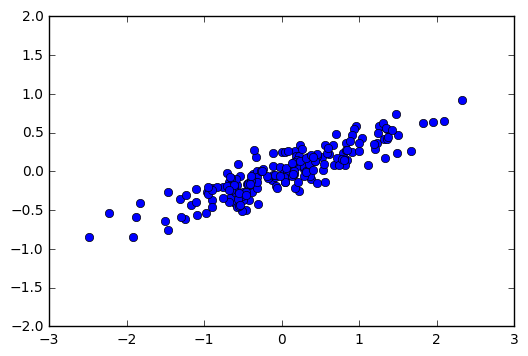

In [18]:
#generate two random features X1,X2
np.random.seed(1)
X=np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
data1 = pd.DataFrame(X,columns=['X1','X2'])
plt.plot(data1.X1, data1.X2, 'o')
plt.axis('equal');
data1.head()

In [19]:
#features X1 and X2 are highly correlated
data1.corr()

,X1,X2
X1,1.00000,0.88939
X2,0.88939,1.00000


How to convert them to uncorrelated features $p_1$,$p_2$ (principal components) using some linear transform P=XV? 

$U$ is a matrix of two columns $p_1$,$p_2$, while $V$ is a $2x2$ conversion matrix.

#### (2) principal components
(in this particular example ~97.6% of the variance is preserved if we project down to the leading principal component)

In [20]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
XS=scaler.transform(X)  

In [21]:
np.linalg.eig(np.dot(XS.transpose(),XS))

(array([  22.1220092,  377.8779908]), array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

In [22]:
V=np.linalg.eig(np.dot(XS.transpose(),XS))[1]

In [25]:
pca = PCA(2,whiten=True) #PCA model, paramerized by the target number of components or target percentage of variance
pca.fit(X) #fit the model to the data
P=pca.transform(X)
print("Transformation matrix V=\n{}".format(V)) #transformation matrix
print("Principal components p1,p2=\n{}".format(P[0:5,:])) 
print("..............")
P1=P[:,0]; P2=P[:,1]; #principal components

Transformation matrix V=
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
Principal components p1,p2=
[[ 0.77696271  0.44057237]
 [-1.22980365  1.89714627]
 [ 0.83567741 -1.24394132]
 [ 2.6515762   1.79999174]
 [ 0.72332951 -2.24683682]]
..............


In [26]:
np.corrcoef(P1,P2)

array([[  1.00000000e+00,   4.90718577e-16],
       [  4.90718577e-16,   1.00000000e+00]])

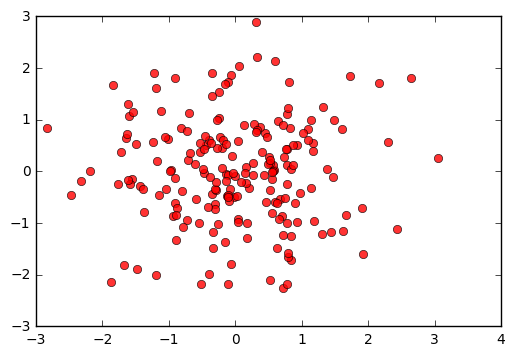

In [7]:
#visualization of uncorrelated components; mind the scale
plt.plot(P1, P2, 'or', alpha=0.8)

In [8]:
print("total variance:{}".format(np.sum(np.var(X,0))))
#print("variance explained via the first and second components:{}, {}\n".format(pca.explained_variance_[0],pca.explained_variance_[1]))
print("variance explained via the first and second components:{}, {}\n".format(np.array(P1).var(),np.array(P2).var()))

total variance:0.777104349414
variance explained via the first and second components:1.0, 1.0



#### (3) let's plot the two eigenvectors-projection axes

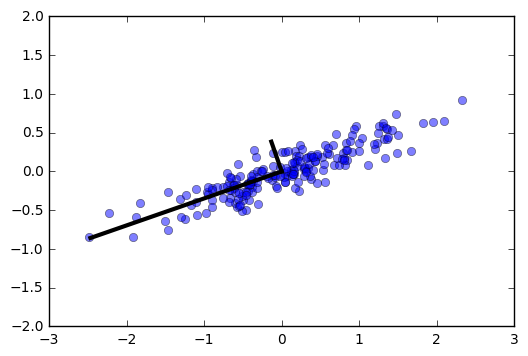

In [9]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

#### (4)projection of the data onto the first axe if the first principal component

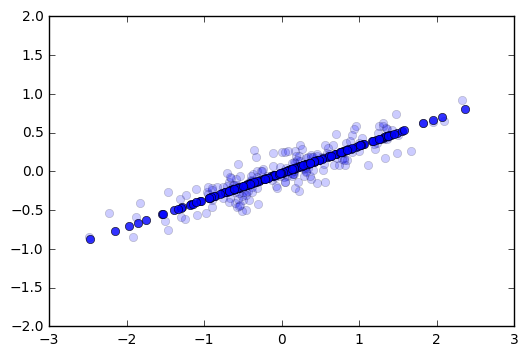

In [10]:
clf = PCA(1) 
X_trans = clf.fit_transform(X)
X_new = clf.inverse_transform(X_trans) # transformed data
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

#### (5) projection on the second is the second principal component 

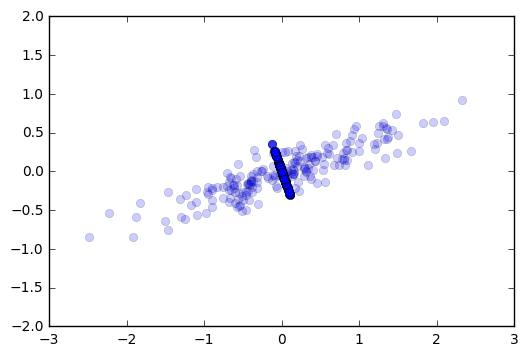

In [11]:
e2=pca.components_[1,:] # this is the 2nd eigenvector
X_new2=(np.dot(X,e2)*e2.reshape((2,1))).T  # this is the data projected onto the 2nd eigenvector
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new2[:, 0], X_new2[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

## Example 2. Classic example (flower characteristics) for dimensionality reduction and classification of the data using PCA 

Iris dataset:
https://en.wikipedia.org/wiki/Iris_flower_data_set
"The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres".

In [12]:
# import a classic dataset on flower species
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
Y = iris.target
data_i=pd.DataFrame(np.concatenate((Y.reshape(len(Y),1),X),axis=1))
data_i.columns=["Species","Sepal_lenth","Sepal_width","Petal_length","Petal_width"]
data_i.head()

,Species,Sepal_lenth,Sepal_width,Petal_length,Petal_width
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2


<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg",width=100,height=100>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg",width=100,height=100>
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg",width=100,height=100>


In [13]:
data_i.describe()

,Species,Sepal_lenth,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.000000,5.843333,3.054000,3.758667,1.198667
std,0.819232,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,0.000000,5.100000,2.800000,1.600000,0.300000
50%,1.000000,5.800000,3.000000,4.350000,1.300000
75%,2.000000,6.400000,3.300000,5.100000,1.800000
max,2.000000,7.900000,4.400000,6.900000,2.500000


# Task 2. 
Perform PCA on the flower characteristics and visualize flowers of different type over the leading two PCs